<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/workshop/PyTorch_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch import optim # optimizers
from sklearn.datasets import load_diabetes

In [6]:
t1 = torch.tensor([1,2,3])
t1

tensor([1, 2, 3])

In [7]:
x = torch.randn(2, 3)
x

tensor([[ 1.6271, -1.1113,  1.2059],
        [ 1.1628, -0.0231, -0.8914]])

RGB (256X256X3)

Grey (256X256X1)

In [9]:
torch.unsqueeze(x,0)

tensor([[[ 1.6271, -1.1113,  1.2059],
         [ 1.1628, -0.0231, -0.8914]]])

In [10]:
torch.unsqueeze(x,1)

tensor([[[ 1.6271, -1.1113,  1.2059]],

        [[ 1.1628, -0.0231, -0.8914]]])

In [11]:
torch.unsqueeze(x,2)

tensor([[[ 1.6271],
         [-1.1113],
         [ 1.2059]],

        [[ 1.1628],
         [-0.0231],
         [-0.8914]]])

In [12]:
y_pred = torch.tensor([[1], [2], [3]])
y = torch.tensor([1,2,5])

In [13]:
torch.squeeze(y_pred,1)

tensor([1, 2, 3])

In [14]:
y_new = torch.unsqueeze(y,1)
y_new

tensor([[1],
        [2],
        [5]])

In [15]:
from sklearn.metrics import mean_squared_error

In [18]:
(4/3)

1.3333333333333333

In [16]:
mean_squared_error(y, y_pred)

1.3333333333333333

In [19]:
x

tensor([[ 1.6271, -1.1113,  1.2059],
        [ 1.1628, -0.0231, -0.8914]])

In [20]:
torch.permute(x,(0,1))

tensor([[ 1.6271, -1.1113,  1.2059],
        [ 1.1628, -0.0231, -0.8914]])

In [21]:
torch.permute(x,(1,0))

tensor([[ 1.6271,  1.1628],
        [-1.1113, -0.0231],
        [ 1.2059, -0.8914]])

In [24]:
x = torch.randn(2, 3)
x.size()
torch.permute(x, ( 1, 0)).size()

torch.Size([3, 2])

In [26]:
# Load the dataset
X_numpy ,y_numpy = load_diabetes(return_X_y=True, scaled = True)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

In [28]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [29]:
X_train.shape

torch.Size([353, 10])

In [30]:
X_test.shape

torch.Size([89, 10])

In [59]:
y_test.shape

torch.Size([89])

In [31]:
X_train.shape[1]

10

In [54]:
num_neurons = 5
# layer1 = nn.Linear(10, 5)
a1_layer = nn.Linear(X_train.shape[1], num_neurons)
a1 = a1_layer.forward(X_train)
a1

# no of parameters = 10*5 = 50 weights and 5 biases = 55

tensor([[-0.1838, -0.1015,  0.3063, -0.0902, -0.3157],
        [-0.1630, -0.1332,  0.2966, -0.0516, -0.3186],
        [-0.2146, -0.0588,  0.3082, -0.0987, -0.2305],
        ...,
        [-0.1809, -0.0904,  0.2738, -0.0729, -0.2478],
        [-0.1661, -0.0849,  0.2727, -0.0321, -0.2735],
        [-0.1926, -0.0667,  0.2271, -0.0601, -0.2424]],
       grad_fn=<AddmmBackward0>)

In [55]:
a1_layer.weight

Parameter containing:
tensor([[ 0.0818,  0.1838, -0.1205, -0.2737,  0.2298, -0.2594, -0.3048, -0.3083,
         -0.1148,  0.0189],
        [-0.1171, -0.2801,  0.0232,  0.1956, -0.0422,  0.1764, -0.0500, -0.2480,
          0.1966, -0.2801],
        [ 0.2295,  0.1454,  0.0669,  0.2922, -0.3036, -0.1043, -0.0569,  0.1766,
         -0.2775,  0.0166],
        [-0.0641, -0.2544, -0.1486, -0.2946,  0.0540,  0.1284, -0.0234,  0.2952,
         -0.1086, -0.2046],
        [-0.2109, -0.1113,  0.1825,  0.2087, -0.2079, -0.2840,  0.1511, -0.2675,
          0.0072, -0.1231]], requires_grad=True)

In [56]:
torch.matmul(a1_layer.weight.data, X_train.T).T + a1_layer.bias.data

tensor([[-0.1838, -0.1015,  0.3063, -0.0902, -0.3157],
        [-0.1630, -0.1332,  0.2966, -0.0516, -0.3186],
        [-0.2146, -0.0588,  0.3082, -0.0987, -0.2305],
        ...,
        [-0.1809, -0.0904,  0.2738, -0.0729, -0.2478],
        [-0.1661, -0.0849,  0.2727, -0.0321, -0.2735],
        [-0.1926, -0.0667,  0.2271, -0.0601, -0.2424]])

In [57]:
a1_layer.forward(X_train)

tensor([[-0.1838, -0.1015,  0.3063, -0.0902, -0.3157],
        [-0.1630, -0.1332,  0.2966, -0.0516, -0.3186],
        [-0.2146, -0.0588,  0.3082, -0.0987, -0.2305],
        ...,
        [-0.1809, -0.0904,  0.2738, -0.0729, -0.2478],
        [-0.1661, -0.0849,  0.2727, -0.0321, -0.2735],
        [-0.1926, -0.0667,  0.2271, -0.0601, -0.2424]],
       grad_fn=<AddmmBackward0>)

In [58]:
a1_layer(X_train) # pytorch recommends

tensor([[-0.1838, -0.1015,  0.3063, -0.0902, -0.3157],
        [-0.1630, -0.1332,  0.2966, -0.0516, -0.3186],
        [-0.2146, -0.0588,  0.3082, -0.0987, -0.2305],
        ...,
        [-0.1809, -0.0904,  0.2738, -0.0729, -0.2478],
        [-0.1661, -0.0849,  0.2727, -0.0321, -0.2735],
        [-0.1926, -0.0667,  0.2271, -0.0601, -0.2424]],
       grad_fn=<AddmmBackward0>)

so we see that

if we make a layer

layer = nn.Linear(10,5)

and use its weight and biases


doing w*x.T + b

or layer.forward(x)

or layer(x)

all 3 of these give us the same results






In [61]:
a1_layer.weight.shape

torch.Size([5, 10])

In [62]:
a1_layer.weight

Parameter containing:
tensor([[ 0.0818,  0.1838, -0.1205, -0.2737,  0.2298, -0.2594, -0.3048, -0.3083,
         -0.1148,  0.0189],
        [-0.1171, -0.2801,  0.0232,  0.1956, -0.0422,  0.1764, -0.0500, -0.2480,
          0.1966, -0.2801],
        [ 0.2295,  0.1454,  0.0669,  0.2922, -0.3036, -0.1043, -0.0569,  0.1766,
         -0.2775,  0.0166],
        [-0.0641, -0.2544, -0.1486, -0.2946,  0.0540,  0.1284, -0.0234,  0.2952,
         -0.1086, -0.2046],
        [-0.2109, -0.1113,  0.1825,  0.2087, -0.2079, -0.2840,  0.1511, -0.2675,
          0.0072, -0.1231]], requires_grad=True)

In [63]:
a1_layer.bias

Parameter containing:
tensor([-0.1755, -0.0968,  0.2803, -0.0709, -0.2731], requires_grad=True)

In [64]:
torch.sigmoid(a1)

tensor([[0.4542, 0.4746, 0.5760, 0.4775, 0.4217],
        [0.4593, 0.4667, 0.5736, 0.4871, 0.4210],
        [0.4465, 0.4853, 0.5764, 0.4754, 0.4426],
        ...,
        [0.4549, 0.4774, 0.5680, 0.4818, 0.4384],
        [0.4586, 0.4788, 0.5678, 0.4920, 0.4321],
        [0.4520, 0.4833, 0.5565, 0.4850, 0.4397]], grad_fn=<SigmoidBackward0>)

In [65]:
# activation
# sigmoid
h1_layer = nn.Sigmoid() # Sigmoid class
h1 = h1_layer.forward(a1)

In [66]:
y_pred_layer = nn.Linear(5, 1)
y_pred = y_pred_layer.forward(h1)
y_pred

tensor([[-0.4029],
        [-0.3999],
        [-0.4060],
        [-0.4032],
        [-0.4015],
        [-0.4015],
        [-0.4033],
        [-0.4031],
        [-0.4019],
        [-0.4043],
        [-0.4006],
        [-0.4032],
        [-0.3993],
        [-0.4052],
        [-0.4017],
        [-0.4015],
        [-0.4038],
        [-0.4024],
        [-0.4021],
        [-0.4036],
        [-0.4041],
        [-0.3984],
        [-0.4053],
        [-0.4050],
        [-0.4029],
        [-0.4016],
        [-0.4031],
        [-0.4023],
        [-0.4017],
        [-0.4026],
        [-0.4040],
        [-0.4036],
        [-0.4025],
        [-0.3988],
        [-0.4032],
        [-0.4008],
        [-0.4028],
        [-0.4019],
        [-0.3996],
        [-0.4023],
        [-0.4023],
        [-0.4030],
        [-0.4009],
        [-0.4018],
        [-0.4027],
        [-0.4039],
        [-0.4021],
        [-0.4055],
        [-0.3999],
        [-0.4006],
        [-0.4044],
        [-0.4007],
        [-0.

In [67]:
y_pred.reshape(y_pred.shape[0])

tensor([-0.4029, -0.3999, -0.4060, -0.4032, -0.4015, -0.4015, -0.4033, -0.4031,
        -0.4019, -0.4043, -0.4006, -0.4032, -0.3993, -0.4052, -0.4017, -0.4015,
        -0.4038, -0.4024, -0.4021, -0.4036, -0.4041, -0.3984, -0.4053, -0.4050,
        -0.4029, -0.4016, -0.4031, -0.4023, -0.4017, -0.4026, -0.4040, -0.4036,
        -0.4025, -0.3988, -0.4032, -0.4008, -0.4028, -0.4019, -0.3996, -0.4023,
        -0.4023, -0.4030, -0.4009, -0.4018, -0.4027, -0.4039, -0.4021, -0.4055,
        -0.3999, -0.4006, -0.4044, -0.4007, -0.4034, -0.4008, -0.4023, -0.4007,
        -0.4034, -0.4035, -0.4020, -0.4003, -0.3996, -0.4018, -0.4063, -0.4047,
        -0.4024, -0.4006, -0.4027, -0.4026, -0.4022, -0.4024, -0.4027, -0.4024,
        -0.4015, -0.4006, -0.4028, -0.4031, -0.4019, -0.4056, -0.4007, -0.4016,
        -0.4011, -0.4011, -0.4001, -0.3992, -0.4057, -0.4049, -0.4018, -0.4054,
        -0.4055, -0.4049, -0.4021, -0.4033, -0.4003, -0.4029, -0.4011, -0.4020,
        -0.4009, -0.4016, -0.4038, -0.40

In [68]:
torch.manual_seed(42)
# Define Model
a1_layer = nn.Linear(X_train.shape[1], 5)
h1_layer = nn.Sigmoid()

y_pred_layer = nn.Linear(5,1)

# Forward Pass
a1 = a1_layer.forward(X_train)
h1 = h1_layer.forward(a1)
y_pred = y_pred_layer.forward(h1)

# Loss calculation
loss_func = nn.MSELoss()
total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
print(f"loss: {total_loss}")

# Backpropagation
total_loss.backward()

# Gradient Updates with a learning rate
eta = 0.01
with torch.no_grad():
    a1_layer.weight -= eta * a1_layer.weight.grad
    a1_layer.bias -= eta * a1_layer.bias.grad
    y_pred_layer.weight -= eta * y_pred_layer.weight.grad
    y_pred_layer.bias -= eta * y_pred_layer.bias.grad


loss: 29649.365234375


This is the model architecture

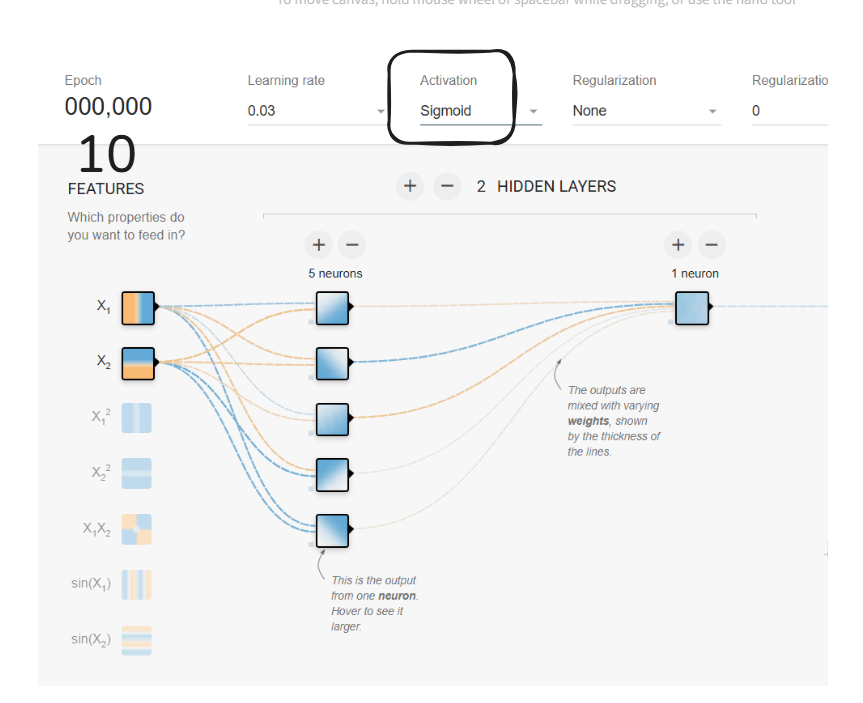

In [69]:
torch.manual_seed(42)
# Define Model
a1_layer = nn.Linear(X_train.shape[1], 5)
h1_layer = nn.Sigmoid()

y_pred_layer = nn.Linear(5,1)

epochs = 1000

for epoch in range(epochs):
  # Forward Pass
  a1 = a1_layer.forward(X_train)
  h1 = h1_layer.forward(a1)
  y_pred = y_pred_layer.forward(h1)

  # Loss calculation
  loss_func = nn.MSELoss()
  total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
  if epoch % 100 == 0:
    print(f" epoch {epoch} loss: {total_loss}")

  # Backpropagation
  total_loss.backward()

  # Gradient Updates with a learning rate
  eta = 0.01
  with torch.no_grad():
      a1_layer.weight -= eta * a1_layer.weight.grad
      a1_layer.bias -= eta * a1_layer.bias.grad
      y_pred_layer.weight -= eta * y_pred_layer.weight.grad
      y_pred_layer.bias -= eta * y_pred_layer.bias.grad

  # Reset gradients
  a1_layer.weight.grad.zero_()
  a1_layer.bias.grad.zero_()
  y_pred_layer.weight.grad.zero_()
  y_pred_layer.bias.grad.zero_()


 epoch 0 loss: 29649.365234375
 epoch 100 loss: 6069.484375
 epoch 200 loss: 4207.7939453125
 epoch 300 loss: 3715.472412109375
 epoch 400 loss: 3299.378662109375
 epoch 500 loss: 3085.05517578125
 epoch 600 loss: 2963.66796875
 epoch 700 loss: 2897.3759765625
 epoch 800 loss: 2853.37060546875
 epoch 900 loss: 2821.2578125


In [70]:
from sklearn.metrics import r2_score

In [71]:
print(r2_score(y_train.numpy(), y_pred.detach().numpy().reshape(-1)))

0.5387930870056152


In [72]:
a1_layer.weight.grad

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
a1_layer.weight.grad.zero_()


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [75]:
abcd = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5,1)
    )

In [76]:
#container
model  = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5,1)
    )

model.forward(X_train) # y_pred

tensor([[0.0866],
        [0.0868],
        [0.0846],
        [0.0867],
        [0.0877],
        [0.0883],
        [0.0854],
        [0.0843],
        [0.0860],
        [0.0887],
        [0.0880],
        [0.0854],
        [0.0852],
        [0.0834],
        [0.0862],
        [0.0873],
        [0.0865],
        [0.0868],
        [0.0865],
        [0.0885],
        [0.0842],
        [0.0873],
        [0.0864],
        [0.0851],
        [0.0871],
        [0.0857],
        [0.0879],
        [0.0863],
        [0.0868],
        [0.0864],
        [0.0877],
        [0.0857],
        [0.0889],
        [0.0867],
        [0.0873],
        [0.0858],
        [0.0839],
        [0.0878],
        [0.0850],
        [0.0849],
        [0.0858],
        [0.0894],
        [0.0870],
        [0.0834],
        [0.0837],
        [0.0852],
        [0.0876],
        [0.0836],
        [0.0866],
        [0.0890],
        [0.0862],
        [0.0865],
        [0.0898],
        [0.0874],
        [0.0875],
        [0

In [77]:
for params in model.parameters():
  print(params)

Parameter containing:
tensor([[ 0.1128,  0.2448, -0.2977,  0.0734,  0.1634,  0.0573, -0.1126,  0.1651,
          0.1662,  0.1182],
        [-0.0556, -0.0837,  0.0338, -0.0559, -0.0942,  0.2021,  0.2718, -0.0313,
         -0.0708,  0.0046],
        [-0.0189,  0.0760,  0.0886, -0.2872, -0.1167,  0.2663,  0.1232, -0.0157,
         -0.1907, -0.1935],
        [-0.2833, -0.1031,  0.1068,  0.2016,  0.1460, -0.2795, -0.1902, -0.0499,
          0.3059,  0.0457],
        [-0.0819,  0.1308, -0.1204, -0.2047,  0.2308, -0.1438, -0.0634, -0.3146,
          0.2116,  0.2396]], requires_grad=True)
Parameter containing:
tensor([ 0.1152, -0.2205, -0.3121, -0.2568,  0.2358], requires_grad=True)
Parameter containing:
tensor([[ 0.2147,  0.3763,  0.2343,  0.1132, -0.0044]], requires_grad=True)
Parameter containing:
tensor([-0.3401], requires_grad=True)


In [78]:
# parameter and learning rate
optim.SGD([a1_layer.weight,a1_layer.bias, ])

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [79]:
sgd = optim.SGD(model.parameters(), lr=0.01)


the below syntax explains why we did

optimizer.zero_grad()

loss.backward()

optimizer.step()


In [85]:
torch.manual_seed(42)

# Define Model

model  = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5,1))

sgd = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):
  # Forward Pass
  y_pred = model.forward(X_train)

  # Loss calculation
  loss_func = nn.MSELoss()
  total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
  if epoch % 100 == 0:
    print(f" epoch {epoch} loss: {total_loss}")

  # reset the gradient
  sgd.zero_grad()

  # Backpropagation
  total_loss.backward()

  # Gradient Updates with a learning rate
  sgd.step()


 epoch 0 loss: 29649.365234375
 epoch 100 loss: 6069.484375
 epoch 200 loss: 4394.001953125
 epoch 300 loss: 3778.209716796875
 epoch 400 loss: 3326.9931640625
 epoch 500 loss: 3098.6083984375
 epoch 600 loss: 2974.92236328125
 epoch 700 loss: 2907.76708984375
 epoch 800 loss: 2862.36083984375
 epoch 900 loss: 2828.70068359375


In [86]:
print(r2_score(y_train.numpy(), y_pred.detach().numpy().reshape(-1)))

0.5396661758422852


In [87]:
torch.manual_seed(42)

# Define Model

model  = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5,1))

# this time we have used a different optimizer

adam = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):
  # Forward Pass
  y_pred = model.forward(X_train)

  # Loss calculation
  loss_func = nn.MSELoss()
  total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
  if epoch % 100 == 0:
    print(f" epoch {epoch} loss: {total_loss}")

  # reset the gradient
  adam.zero_grad()

  # Backpropagation
  total_loss.backward()

  # Gradient Updates with a learning rate
  adam.step()


 epoch 0 loss: 29649.365234375
 epoch 100 loss: 28109.75
 epoch 200 loss: 25992.85546875
 epoch 300 loss: 24059.263671875
 epoch 400 loss: 22356.244140625
 epoch 500 loss: 20827.775390625
 epoch 600 loss: 19438.4765625
 epoch 700 loss: 18166.89453125
 epoch 800 loss: 16998.826171875
 epoch 900 loss: 15924.0322265625


In [88]:
print(r2_score(y_train.numpy(), y_pred.detach().numpy().reshape(-1)))

-1.4593653678894043


In [89]:
torch.manual_seed(42)

# Define Model
# this time we have structured our model a bit differently
model  = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5,6),
    nn.ReLU(),
    nn.Linear(6,1))

adam = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):
  # Forward Pass
  y_pred = model.forward(X_train)

  # Loss calculation
  loss_func = nn.MSELoss()
  total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
  if epoch % 100 == 0:
    print(f" epoch {epoch} loss: {total_loss}")

  # reset the gradient
  adam.zero_grad()

  # Backpropagation
  total_loss.backward()

  # Gradient Updates with a learning rate
  adam.step()


 epoch 0 loss: 29757.2578125
 epoch 100 loss: 23464.60546875
 epoch 200 loss: 8872.326171875
 epoch 300 loss: 5260.25439453125
 epoch 400 loss: 4402.37353515625
 epoch 500 loss: 3801.452880859375
 epoch 600 loss: 3392.584716796875
 epoch 700 loss: 3152.626708984375
 epoch 800 loss: 3023.119384765625
 epoch 900 loss: 2955.099853515625


use this format by subclassing nn.Module

In [90]:
class MyModel(nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(num_features, 5),
        nn.Sigmoid(),
        nn.Linear(5, 1))

  def forward(self, Xdata):
    out = self.network(Xdata)
    return out

In [91]:
model1 = MyModel(X_train.shape[1])
model1

MyModel(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [93]:
torch.manual_seed(42)

model = MyModel(X_train.shape[1])

adam = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs):
  # for batches
  # Forward Pass
  y_pred = model.forward(X_train)

  # Loss calculation
  loss_func = nn.MSELoss()
  total_loss = loss_func(y_pred.reshape(y_pred.shape[0]), y_train)
  if epoch % 100 == 0:
    print(f" epoch {epoch} loss: {total_loss}")

  # reset the gradient
  adam.zero_grad()

  # Backpropagation
  total_loss.backward()

  # Gradient Updates with a learning rate
  adam.step()


 epoch 0 loss: 29649.365234375
 epoch 100 loss: 28109.75
 epoch 200 loss: 25992.85546875
 epoch 300 loss: 24059.263671875
 epoch 400 loss: 22356.244140625
 epoch 500 loss: 20827.775390625
 epoch 600 loss: 19438.4765625
 epoch 700 loss: 18166.89453125
 epoch 800 loss: 16998.826171875
 epoch 900 loss: 15924.0322265625


# dataset
images, documents, videos, audio
folder1 == class0
folder2 = class1
- transformation
  - cropping
  - augment
  - normalizing

# dataloader
 - shuffling
 - streamline
 - batching
 -





In [94]:
from torch.utils.data import Dataset, DataLoader

In [95]:
class myCustomDataset(Dataset):
  def __init__(self, X,y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    #transformation


    return self.X[idx], self.y[idx]


https://machinelearningmastery.com/using-dataset-classes-in-pytorch/

In [97]:
class SimpleDataset(Dataset):
    # defining values in the constructor
    def __init__(self, data_length = 20, transform = None):
        # data = pd.read_csv("file_path")
        self.x = 3 * torch.eye(data_length, 2)
        self.y = torch.eye(data_length, 4)
        self.transform = transform
        self.len = data_length

    # Getting the data samples
    def __getitem__(self, idx):
        sample = self.x[idx], self.y[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

    # Getting data size/length
    def __len__(self):
        return self.len

In [99]:
dataset = SimpleDataset()
print("length of the SimpleDataset object: ", len(dataset))
print("accessing value at index 1 of the simple_dataset object: ", dataset[1])

length of the SimpleDataset object:  20
accessing value at index 1 of the simple_dataset object:  (tensor([0., 3.]), tensor([0., 1., 0., 0.]))


In [100]:
# Creating a callable tranform class mult_divide
class MultDivide:
    # Constructor
    def __init__(self, mult_x = 2, divide_y = 3):
        self.mult_x = mult_x
        self.divide_y = divide_y

    # caller
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult_x
        y = y / self.divide_y
        sample = x, y
        return sample

In [101]:
# calling the transform object
mul_div = MultDivide()
custom_dataset = SimpleDataset(transform = mul_div)

for i in range(4):
    x, y = dataset[i]
    print('Idx: ', i, 'Original_x: ', x, 'Original_y: ', y)
    x_, y_ = custom_dataset[i]
    print('Idx: ', i, 'Transformed_x:', x_, 'Transformed_y:', y_)

Idx:  0 Original_x:  tensor([3., 0.]) Original_y:  tensor([1., 0., 0., 0.])
Idx:  0 Transformed_x: tensor([6., 0.]) Transformed_y: tensor([0.3333, 0.0000, 0.0000, 0.0000])
Idx:  1 Original_x:  tensor([0., 3.]) Original_y:  tensor([0., 1., 0., 0.])
Idx:  1 Transformed_x: tensor([0., 6.]) Transformed_y: tensor([0.0000, 0.3333, 0.0000, 0.0000])
Idx:  2 Original_x:  tensor([0., 0.]) Original_y:  tensor([0., 0., 1., 0.])
Idx:  2 Transformed_x: tensor([0., 0.]) Transformed_y: tensor([0.0000, 0.0000, 0.3333, 0.0000])
Idx:  3 Original_x:  tensor([0., 0.]) Original_y:  tensor([0., 0., 0., 1.])
Idx:  3 Transformed_x: tensor([0., 0.]) Transformed_y: tensor([0.0000, 0.0000, 0.0000, 0.3333])


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 275kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.99MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



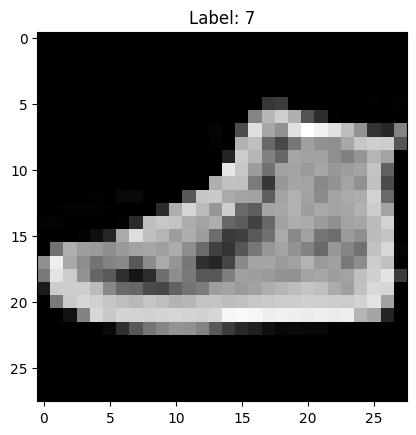

In [102]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
])

# Download and load the Fashion MNIST dataset with normalization
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader for batch processing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Visualize a sample
data_iter = iter(train_loader)
images, labels = next(data_iter)

# De-normalize for visualization (optional)
image = images[0] * 0.5 + 0.5  # Reverse normalization for display
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()
